In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tueplots import bundles
#from tueplots.constants.colors import rgb

In [83]:
df = pd.read_csv("/Users/lilieven/Documents/Master/Dataliteracy_2/testlizenz-tuebingen-dataliteracy4students_1701258214900/testlizenz-tuebingen-dataliteracy4students_1701258214900.csv", sep=";", encoding='unicode_escape', decimal=",")
#df.info(verbose=True)
df.shape

(10574, 86)

## Heatmap
Um die Korrelationen zwischen den Parametern zuerkennen, haben wir eine Heatmap erstellt.
Es werden nur die Parameter betrachtet, die eine Zahl als Datentyp haben (int64 und float64).

Problem: Haben trotzdem noch 71 Parameter (58, wenn die mit nur NaN Werten entfernt werden). Das passt nicht in eine Heatmap bzw. Heatmap ist zu groß.
--> müssen Parameter die eh nicht so wichtig sind 'rausschmeißen' 

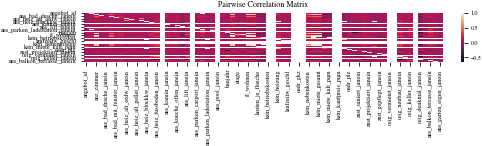

In [50]:

def remove_non_number_types(df):
    df_copy = pd.DataFrame()
    for col in df.columns:
        allowed= ["int64", "float64"]
        if str(df[col].dtype) in allowed:
            df_copy[col] = df[col]
    return df_copy

df_copy = remove_non_number_types(df)
#df_copy.info(verbose=True)
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix)
plt.title('Pairwise Correlation Matrix')
plt.show()

# for column in  df_copy.columns:
#     for other_column in df_copy.columns:
#         index = pd.notna(df_copy[column]) & pd.notna(df_copy[other_column])
#         correlation = df_copy[column][index].corr(df_copy[other_column][index])
        
#         print(f"Correlation between {column} and {other_column}: {correlation}")



# sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Pairwise Correlation Matrix')
# plt.show()


#correlation_matrix = df_no_na.corr()





<AxesSubplot:>

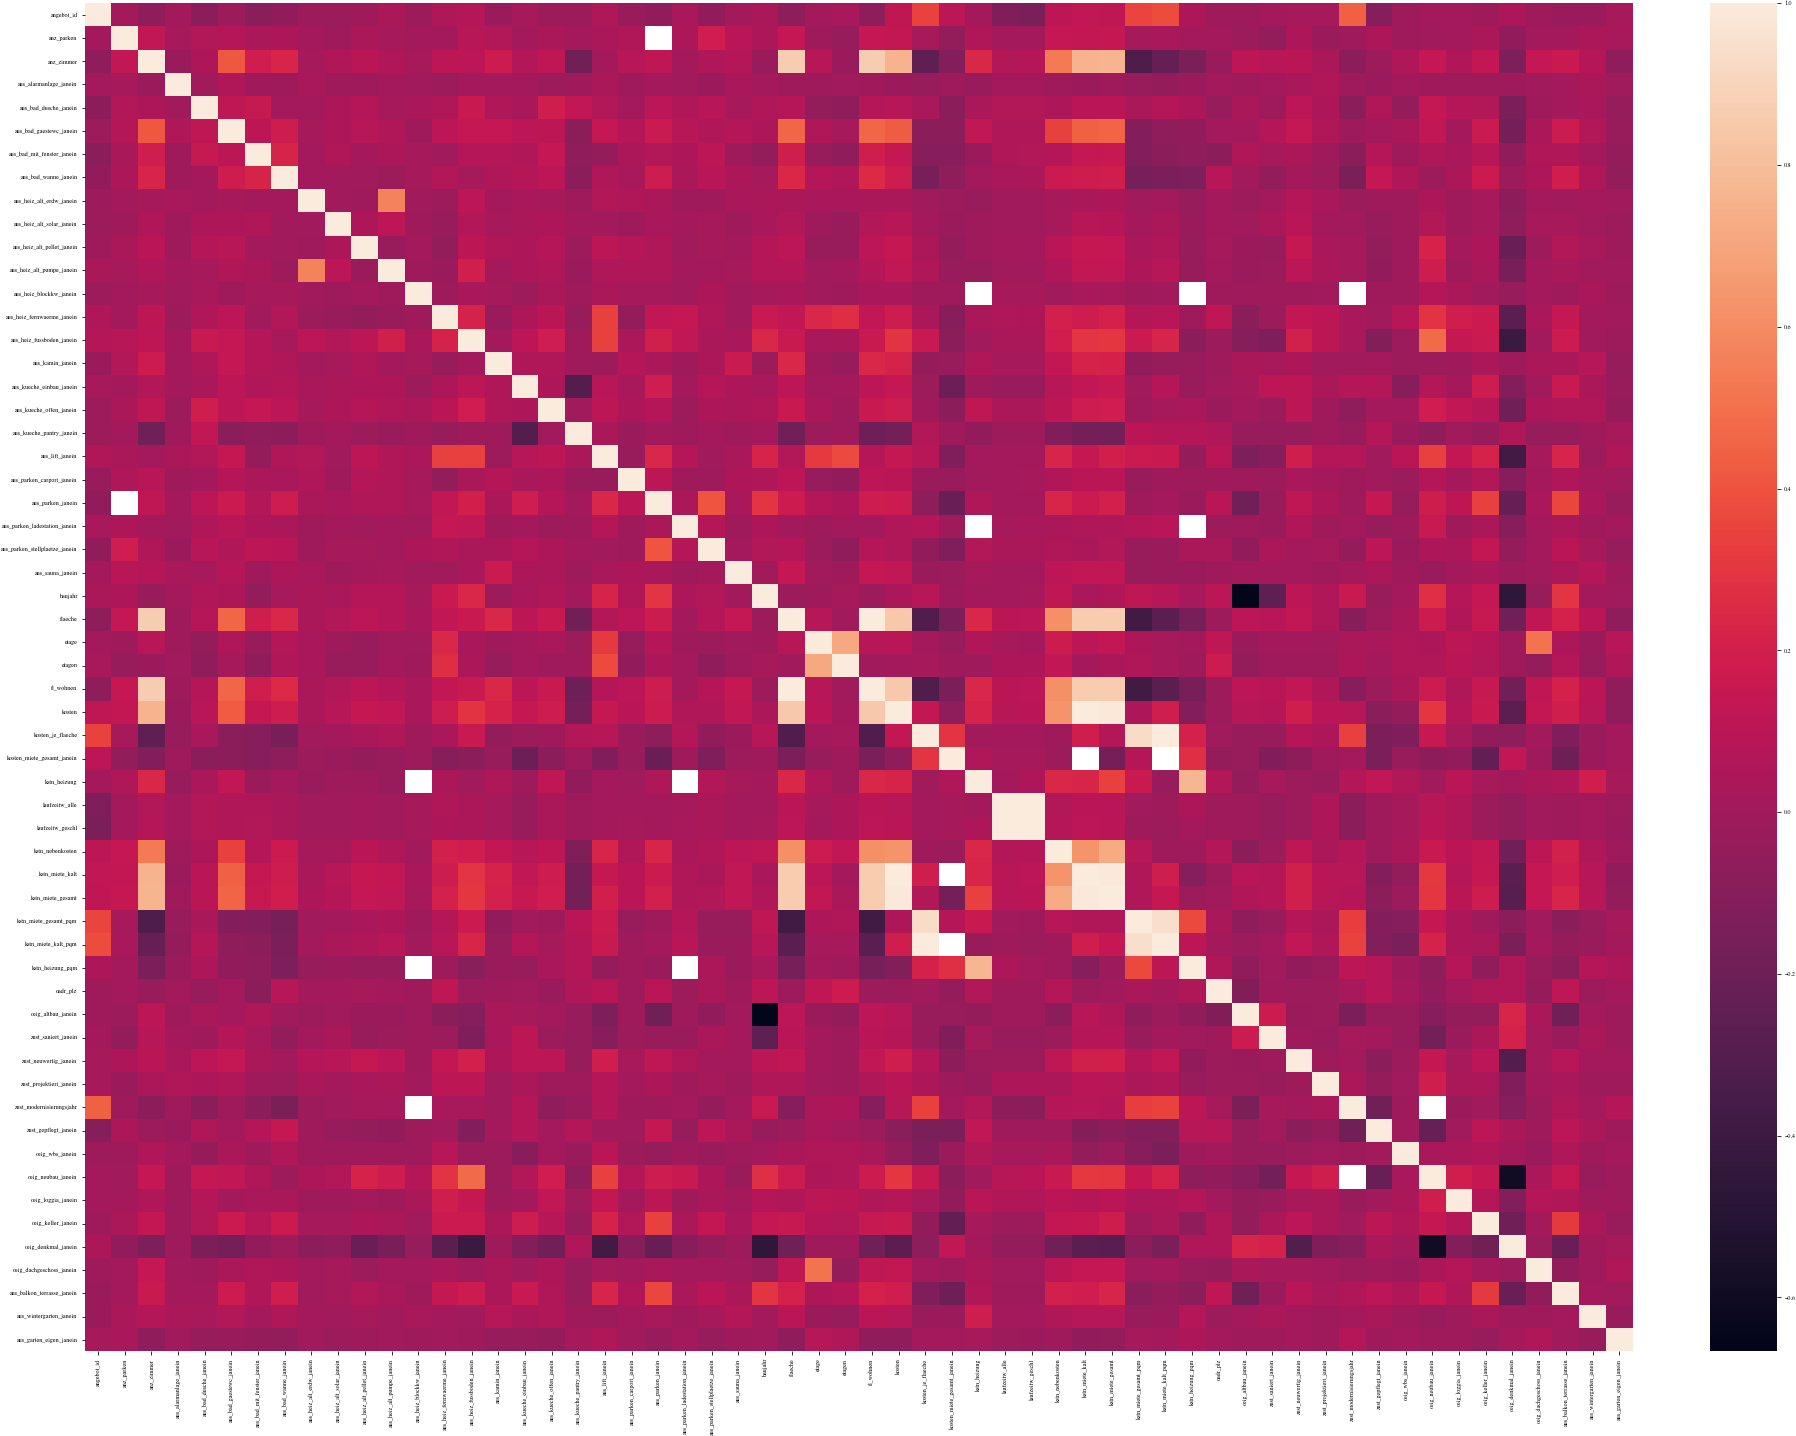

In [84]:
df_num = df.select_dtypes('number')
corr = df_num.corr()
corr_na_col_missing = corr.dropna(axis=1, how='all')
corr_na_missing = corr_na_col_missing.dropna(how='all')
oadr_u2 = df["oadr_u2"].unique()
plt.subplots(figsize=(25,20))
sns.heatmap(corr_na_missing)
#df_num.info(verbose=True)
#corr_na_missing.info(verbose=True)

## Lineare Regression
Wir wollen den Verlauf der kalt Miete pro qm über die Zeit analysieren für jeden Stadteil.
Haben dafür erstmal einen Scatterplot erstellt.
Danach haben wir noch lineare regression ergänzt.

Problem: Auf der x-Achse haben wir eine Zeitreihe --> keine unabhängigen Variablen, was eine Vorraussetzun bei lineare Regression ist

/opt/homebrew/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  self._figure.tight_layout(*args, **kwargs)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


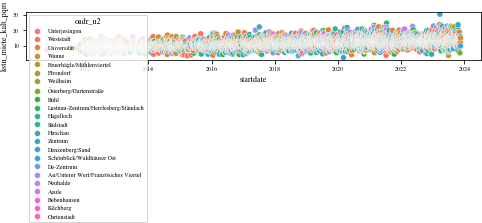

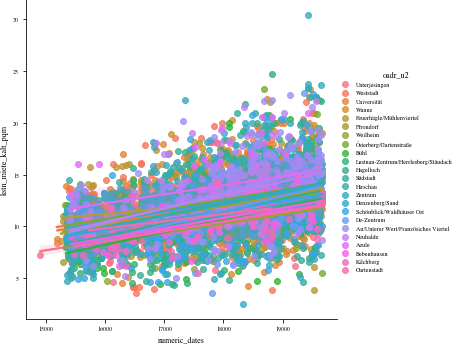

[nan,
 'Universität',
 'Schönblick/Waldhäuser Ost',
 'Zentrum',
 'Südstadt',
 'Kilchberg',
 'Au/Unterer Wert/Französiches Viertel',
 'Bebenhausen',
 'Österberg/Gartenstraße',
 'Weststadt',
 'Pfrondorf',
 'Wanne',
 'Unterjesingen',
 'Feuerhägle/Mühlenviertel',
 'Bühl',
 'De-Zentrum',
 'Lustnau-Zentrum/Herrlesberg/Stäudach',
 'Weilheim',
 'Denzenberg/Sand',
 'Hirschau',
 'Hagelloch',
 'Neuhalde',
 'Aeule',
 'Gartenstadt']

In [85]:
import datetime
from matplotlib.dates import date2num
df['kstn_miete_kalt_pqm'].dropna(inplace=True)
oadr_u2 = df["oadr_u2"].unique().tolist()

df['startdate'] = pd.to_datetime(df['startdate'])
df = df.sort_values(by='startdate')
#[datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in df['startdate']]

#plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))
#scatterplot
#fig, ax = plt.subplots(1, 2)
sns.scatterplot(data=df, x="startdate", y="kstn_miete_kalt_pqm", hue="oadr_u2")

#ax.set_title("title")
#liner regression
numeric_dates = date2num(df['startdate'])
df['numeric_dates'] = numeric_dates
sns.lmplot(x="numeric_dates", y="kstn_miete_kalt_pqm", hue="oadr_u2", data=df)
plt.show()


/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


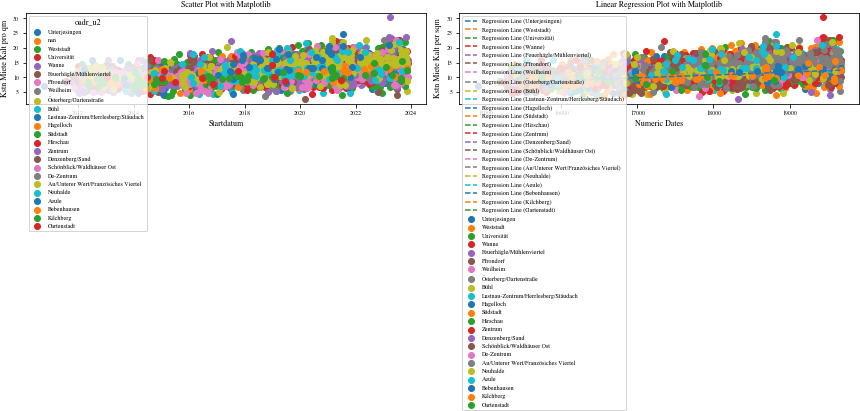

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import date2num

categories = df['oadr_u2'].unique()

numeric_dates = date2num(df['startdate'])
df['numeric_dates'] = numeric_dates

plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

for category in categories:
    subset = df[df['oadr_u2'] == category]
    axs[0].scatter(
        x=subset["startdate"],
        y=subset["kstn_miete_kalt_pqm"],
        label=category
    )
    if not subset.empty:
        coefficients = np.polyfit(subset["numeric_dates"], subset["kstn_miete_kalt_pqm"], 1)
        line = np.polyval(coefficients, subset["numeric_dates"])
        axs[1].scatter(x=subset["numeric_dates"], y=subset["kstn_miete_kalt_pqm"], label=category)
        axs[1].plot(subset["numeric_dates"], line, label=f"Regression Line ({category})", linestyle='--')



axs[0].set_xlabel("Startdatum")
axs[0].set_ylabel("Kstn Miete Kalt pro qm")
axs[0].set_title("Scatter Plot with Matplotlib")
axs[0].legend(title="oadr_u2")


axs[1].set_xlabel("Numeric Dates")
axs[1].set_ylabel("Kstn Miete Kalt per sqm")
axs[1].set_title("Linear Regression Plot with Matplotlib")
axs[1].legend()

plt.show()


In [54]:
df['kstn_miete_kalt_pqm'].dropna()
x = df['startdate']
y = df["kstn_miete_kalt_pqm"]

#model = LinearRegression().fit(x, y)

## In welchen Monaten werden am meisten Wohnungen online gestellt?

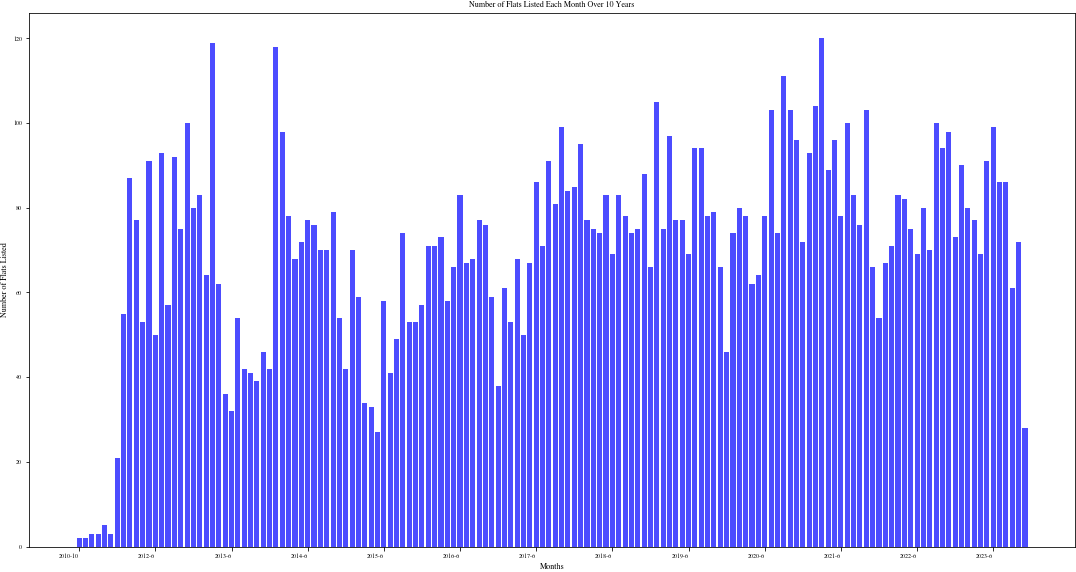

In [62]:
df['year'] = df['startdate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

plt.figure(figsize=(15, 8))
plt.bar(monthly_counts.index, monthly_counts['count'], color='blue', alpha=0.7)

plt.title('Number of Flats Listed Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Number of Flats Listed')

tick_positions = monthly_counts.index[::12] 
tick_labels = [f"{year}-{month}" for year, month in zip(monthly_counts['year'][tick_positions], monthly_counts['month'][tick_positions])]
plt.xticks(tick_positions, tick_labels, ha='right')

plt.show()

#kde=True
# sns.histplot(data=df, x="startdate",bins=12)
# plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])



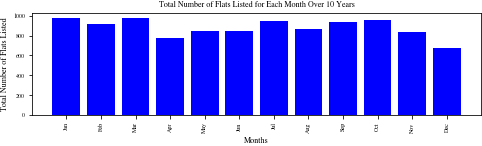

In [63]:
df['year'] = df['startdate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

#plt.figure(figsize=(15, 8))
plt.bar(monthly_counts_summed['month'], monthly_counts_summed['total_count'], color='blue')

plt.title('Total Number of Flats Listed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats Listed')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_counts_summed['month'], month_names, rotation='vertical')

plt.show()

## In welchen Monaten werden Inserate am öftesten rausgenommen?

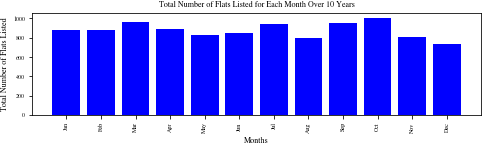

In [65]:
df['year'] = df['enddate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['enddate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

#plt.figure(figsize=(15, 8))
plt.bar(monthly_counts_summed['month'], monthly_counts_summed['total_count'], color='blue')

plt.title('Total Number of Flats Listed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats Listed')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_counts_summed['month'], month_names, rotation='vertical')

plt.show()

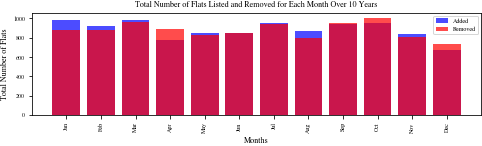

In [66]:
df['year'] = df['startdate'].str[:4] 
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')
monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

df['year_removed'] = df['enddate'].str[:4]
df["month_removed"] = pd.DatetimeIndex(df['enddate']).month
monthly_removed_counts = df.groupby(['year_removed', 'month_removed']).size().reset_index(name='removed_count')
monthly_removed_counts_summed = monthly_removed_counts.groupby('month_removed')['removed_count'].sum().reset_index(name='total_removed_count')

#plt.figure(figsize=(15, 8))
plt.bar(monthly_counts_summed['month'], monthly_counts_summed['total_count'], color='blue', alpha=0.7, label='Added')
plt.bar(monthly_removed_counts_summed['month_removed'], monthly_removed_counts_summed['total_removed_count'], color='red', alpha=0.7, label='Removed')

plt.title('Total Number of Flats Listed and Removed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_counts_summed['month'], month_names, rotation='vertical')
plt.legend()
plt.show()

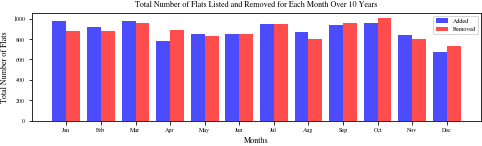

In [80]:
months = monthly_counts_summed['month']
bar_width = 0.4
bar_positions_added = months - bar_width/2
bar_positions_removed = months + bar_width/2

plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))
fig, axs = plt.subplots(1, 1)

plt.bar(bar_positions_added, monthly_counts_summed['total_count'], width=bar_width, color='blue', alpha=0.7, label='Added')
plt.bar(bar_positions_removed, monthly_removed_counts_summed['total_removed_count'], width=bar_width, color='red', alpha=0.7, label='Removed')

plt.title('Total Number of Flats Listed and Removed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.show()


## Welche Inserate bleiben wie lange drin?

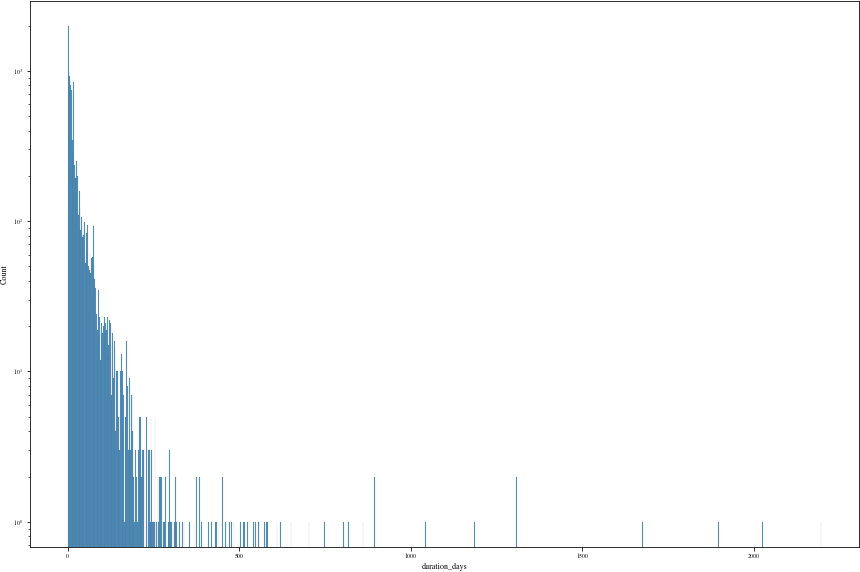

In [45]:
df= df.dropna(subset=['startdate', 'enddate'])

df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])

df['duration'] = df['enddate'] - df['startdate']
df['duration_days'] = df['duration'].dt.days

#print(df[['startdate', 'enddate', 'duration_days']])
plt.subplots(figsize=(12, 8))
g = sns.histplot(data=df, x="duration_days")

#add this line for log scaled y-axis
g.set_yscale('log')

# ax.set_xlim(0,30)
# ax.set_xticks(range(0,31))